# Analysis Process #

##   1 EDA (Exploratory Data Analysis ) - ##
###   Energy Production and Consumption Distributions ###

C:\Users\Mahadev\AppData\Local\Temp\ipykernel_12732\3446801290.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Month'] = pd.to_datetime(data['Month'], errors='coerce')


Month                                    0
Total Fossil Fuels Production            0
Nuclear Electric Power Production        0
Total Renewable Energy Production        0
Total Primary Energy Production          0
Primary Energy Imports                   0
Primary Energy Exports                   0
Primary Energy Net Imports               0
Primary Energy Stock Change and Other    0
Total Fossil Fuels Consumption           0
Nuclear Electric Power Consumption       0
Total Renewable Energy Consumption       0
Total Primary Energy Consumption         0
dtype: int64


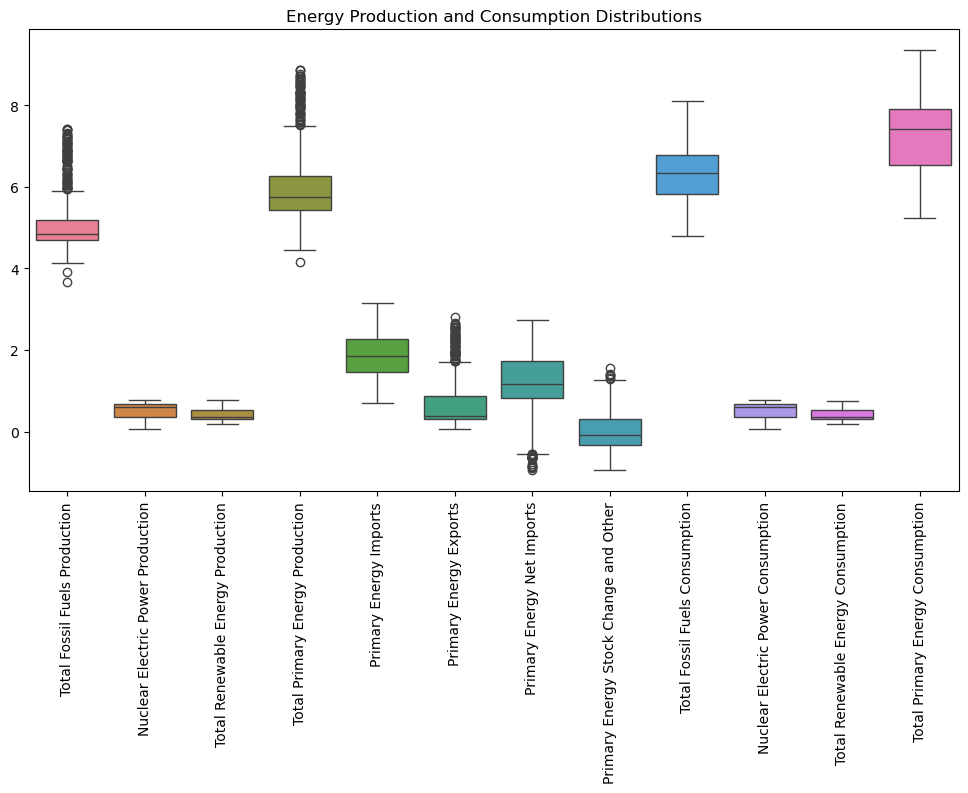

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Energy_Consumption(1).csv'
data = pd.read_csv(file_path)

# Clean and format the data
data = data.dropna(subset=['Month'])  # Remove rows with missing Month
data = data[1:]  # Remove redundant header rows
data.reset_index(drop=True, inplace=True)

# Convert numerical columns to float
numerical_cols = data.columns[1:]
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert Month column to datetime
data['Month'] = pd.to_datetime(data['Month'], errors='coerce')

# Check for missing values
print(data.isnull().sum())

# Plot distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols])
plt.title("Energy Production and Consumption Distributions")
plt.xticks(rotation=90)
plt.show()


## 2.Time-series Analysis - ##

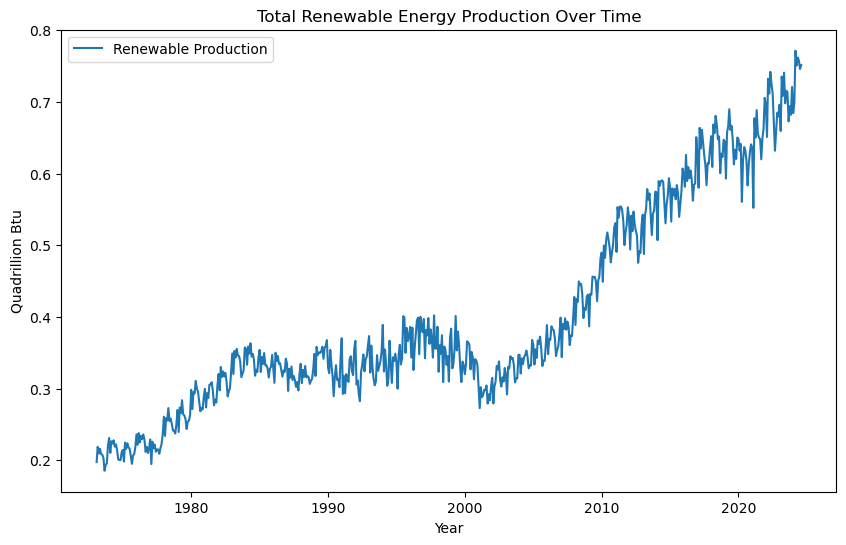

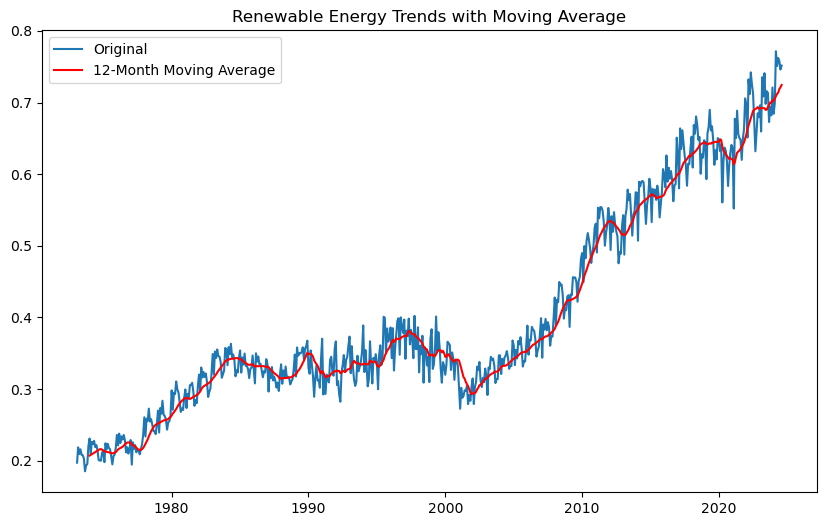

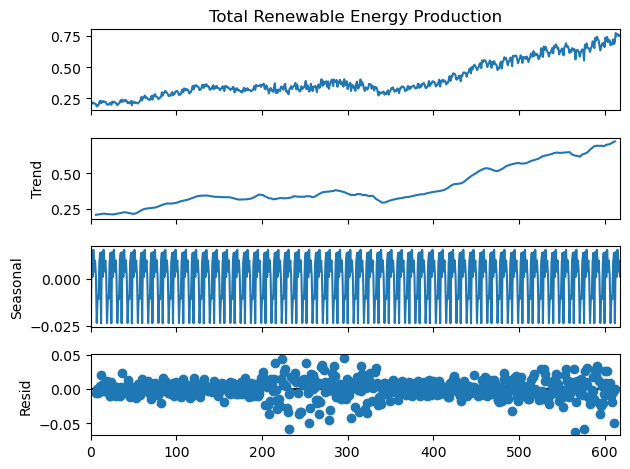

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Focus on Renewable Energy Trends
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Total Renewable Energy Production'], label='Renewable Production')
plt.title("Total Renewable Energy Production Over Time")
plt.xlabel("Year")
plt.ylabel("Quadrillion Btu")
plt.legend()
plt.show()

# Moving Average to identify trends
data['Renewable_MA'] = data['Total Renewable Energy Production'].rolling(window=12).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Total Renewable Energy Production'], label='Original')
plt.plot(data['Month'], data['Renewable_MA'], label='12-Month Moving Average', color='red')
plt.title("Renewable Energy Trends with Moving Average")
plt.legend()
plt.show()

# Decompose into Trend, Seasonality, Residuals
result = seasonal_decompose(data['Total Renewable Energy Production'].dropna(), period=12, model='additive')
result.plot()
plt.show()


## 3.Correlation Analysis- ##

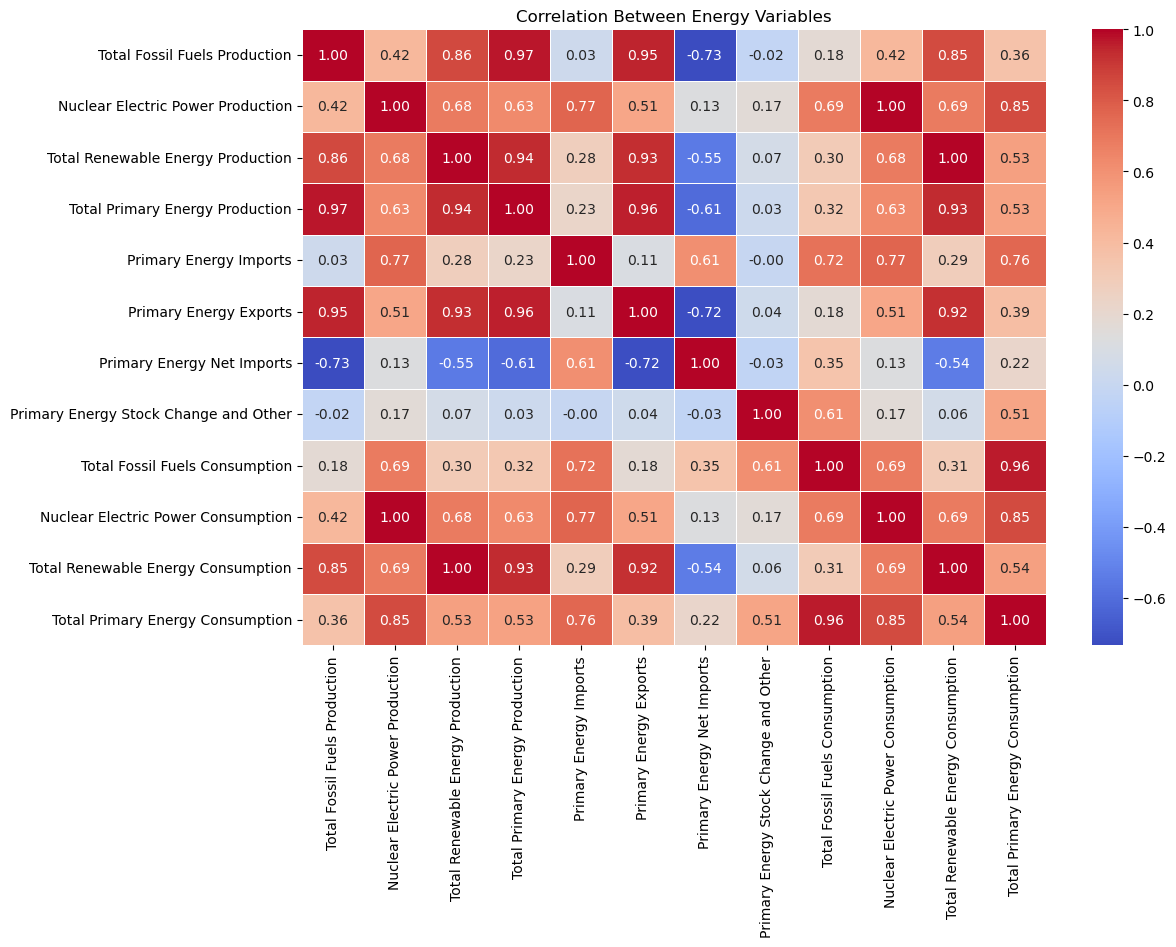

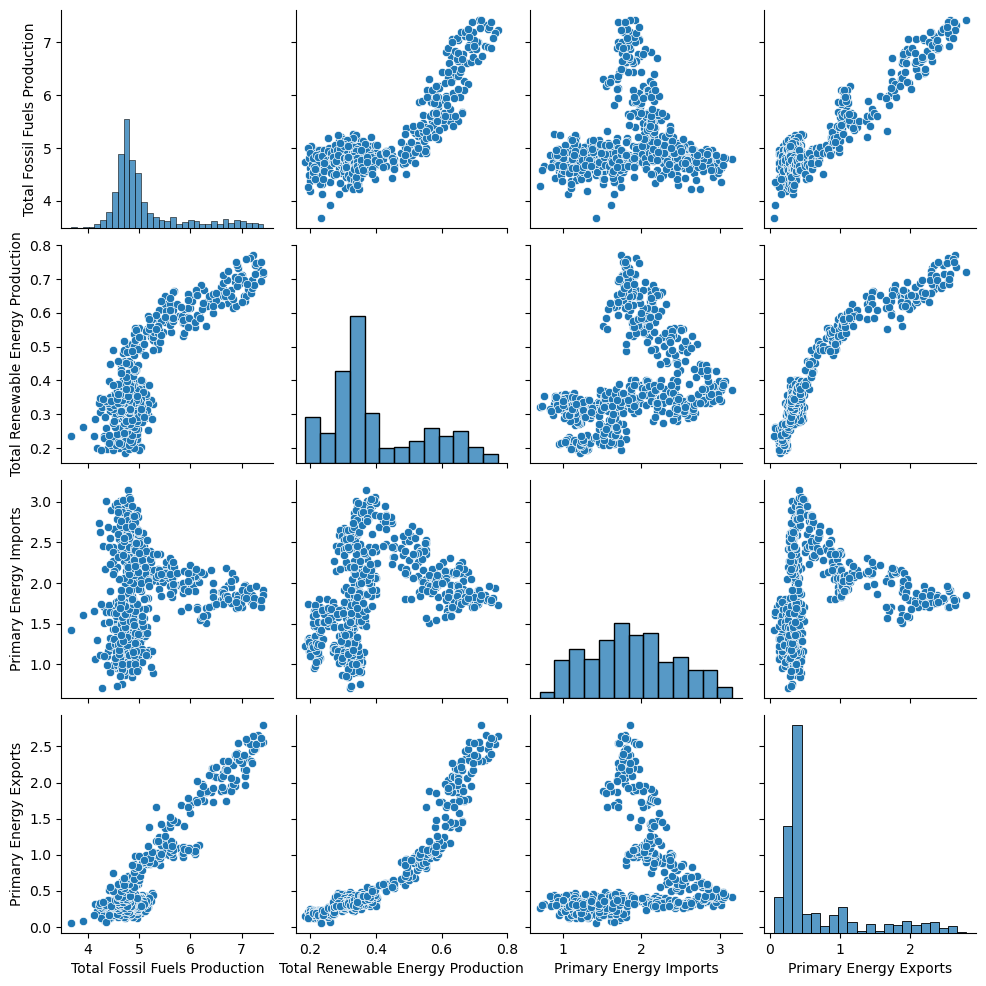

In [27]:
# Correlation Matrix
correlation_matrix = data[numerical_cols].corr()

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Energy Variables")
plt.show()

# Pair Plot for Selected Features
selected_cols = ['Total Fossil Fuels Production', 'Total Renewable Energy Production', 
                 'Primary Energy Imports', 'Primary Energy Exports']
sns.pairplot(data[selected_cols])
plt.show()


## 4. Predictive Analysis (ARIMA for Renewable Energy) ##

M:\Workdesk\Anakonda notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
M:\Workdesk\Anakonda notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
M:\Workdesk\Anakonda notebook\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
M:\Workdesk\Anakonda notebook\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
M:\Workdesk\Anakonda notebook\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-inv

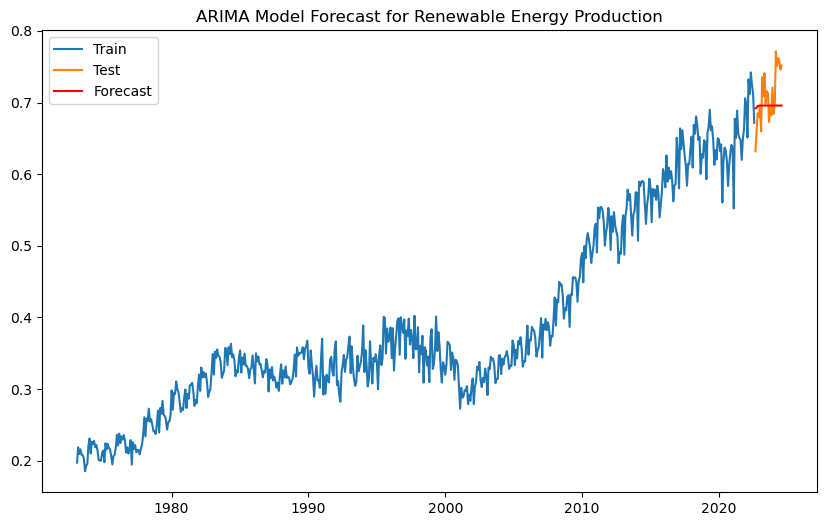

Root Mean Squared Error (RMSE): 0.04


In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for ARIMA
renewable_energy = data[['Month', 'Total Renewable Energy Production']].dropna()
renewable_energy.set_index('Month', inplace=True)

# Train-Test Split
train = renewable_energy[:-24]
test = renewable_energy[-24:]

# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # p, d, q values can be tuned
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=24)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast for Renewable Energy Production")
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


## 5.Efficiency and Balance Analysis - ##
### Net Energy Balance Over Time 
### Energy Imports, Exports, and Consumption Over Time 

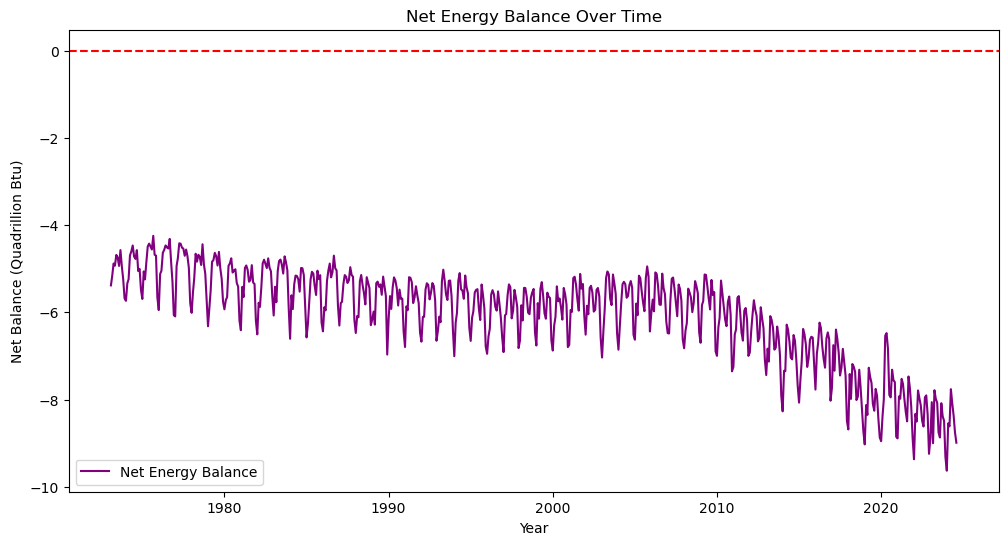

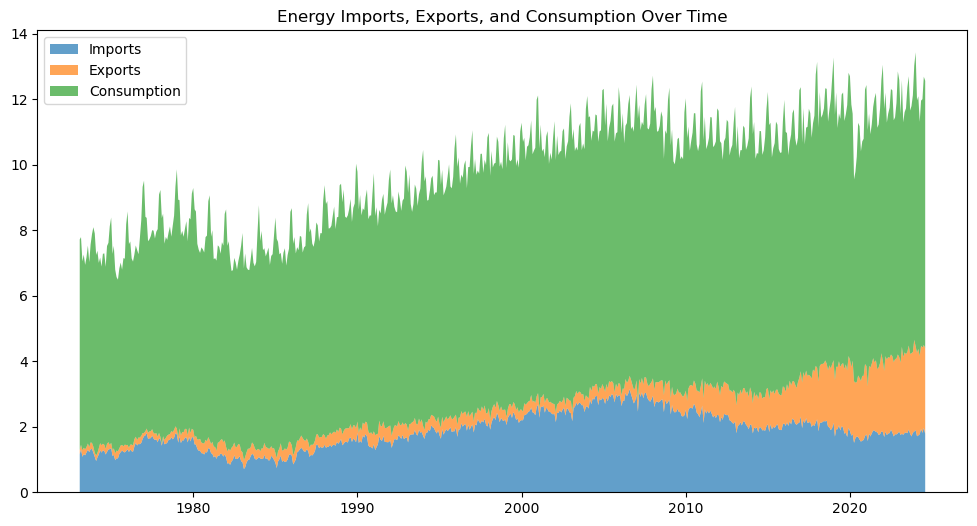

In [29]:
# Calculate Energy Balance (Imports - Exports - Consumption)
data['Net Energy Balance'] = data['Primary Energy Imports'] - data['Primary Energy Exports'] - data['Total Primary Energy Consumption']

# Plot Net Energy Balance Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Net Energy Balance'], label='Net Energy Balance', color='purple')
plt.title("Net Energy Balance Over Time")
plt.xlabel("Year")
plt.ylabel("Net Balance (Quadrillion Btu)")
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.show()

# Stacked Area Chart of Imports, Exports, and Consumption
plt.figure(figsize=(12, 6))
plt.stackplot(data['Month'], 
              data['Primary Energy Imports'], 
              data['Primary Energy Exports'], 
              data['Total Primary Energy Consumption'], 
              labels=['Imports', 'Exports', 'Consumption'], alpha=0.7)
plt.title("Energy Imports, Exports, and Consumption Over Time")
plt.legend(loc='upper left')
plt.show()


  #                                                            THANK YOU                                                      #